## Investigate Business Hotel using Data Visualization

Name : Muhammad Hendrawan Hidayat

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None, "display.precision", 2)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Data

df = pd.read_csv("/content/drive/MyDrive/Rakamin/Mini Project/2. Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv")

### Data Exploration

In [4]:
# Show Data Sample

df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
64645,City Hotel,1,28,2019,May,11,14,0,3,1,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1.0,NaN,0,Family,65.0,0,0,Canceled
34604,Resort Hotel,0,18,2019,May,13,28,0,3,2,0.0,0,Dinner,Kabupaten Bangka,Online TA,TA/TO,0,0,0,1,No Deposit,314.0,NaN,0,Personal,80.0,0,0,Check-Out
44476,City Hotel,1,97,2017,December,41,5,1,3,1,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,29.0,NaN,0,Personal,140.0,0,0,Canceled
83964,City Hotel,0,14,2018,April,7,13,2,1,2,0.0,0,No Meal,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,79.0,0,1,Check-Out
1515,Resort Hotel,0,62,2017,November,36,1,2,10,2,0.0,0,Breakfast,Kabupaten Kuningan,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,113.0,0,2,Check-Out


In [5]:
# Show Data Rows & Features Number

print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 119390
Total Features : 29


In [6]:
# Show Duplicates Data Number

df.duplicated().sum()

33261

In [7]:
# Show Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null Num,Null Pct,Unique Num,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Num,Null Pct,Unique Num,Unique Sample
0,hotel,object,0,0.00e+00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00e+00,2,"[0, 1]"
2,lead_time,int64,0,0.00e+00,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.00e+00,3,"[2017, 2018, 2019]"
4,arrival_date_month,object,0,0.00e+00,12,"[September, October, November, December, January]"
5,arrival_date_week_number,int64,0,0.00e+00,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.00e+00,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.00e+00,17,"[0, 1, 2, 4, 3]"
8,stays_in_weekdays_nights,int64,0,0.00e+00,35,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.00e+00,14,"[2, 1, 3, 4, 40]"


Key Takeaways :

1. We have `33261` duplicate values. Need to drop these data later.
2. We have several features with null values. We will add spesific value for these null data. Will be explained later.
3. There is no issue with each features data type.
4. `is_canceled` and `is_repeated_guest` should have bool data type and `Children`, `Agent`, and `Company` should have int data type, but it's not a big deal if we go with current data type.
5. `Agent` and `Company` features seems refer to its ID, we can't analyze further these features otherwise we have its name.

In [8]:
# Show Numeric Statistic Value

df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,3.70e-01,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,1.04e+02,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2.02e+03,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,2.72e+01,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,1.58e+01,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,9.28e-01,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50e+00,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86e+00,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,1.04e-01,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,7.95e-03,0.10,0.00,0.00,0.00,0.0,10.0


Key Takeaway :

1. There is an issue in `adr (average daily rate)` feature where we have negative values. It is an anomaly, we need to drop these data.

In [9]:
# Show Categoric Statistic Value

df.describe(exclude=np.number).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


Key Takeaway :
1. There is no issue.

In [10]:
df[(df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']) == 0].shape[0]

715

In [11]:
df[(df['adults'] + df['children'] + df['babies']) == 0].shape[0]

180

Key Takeaway :

1. There are 715 data with 0 night stay and 180 data with 0 guest. It is an anomaly values. Need to drop these data later.

### Data Preprocessing

In [12]:
# Create New Clean Dataframe

clean_df = df.copy()

In [13]:
# Drop Duplicates Data

clean_df.drop_duplicates(inplace = True)

In [14]:
# Compare Rows Number

print("Total Rows Before Drop Duplicates :", df.shape[0])
print("Total Rows Before After Duplicates :", clean_df.shape[0])

Total Rows Before Drop Duplicates : 119390
Total Rows Before After Duplicates : 86129


In [15]:
# Fill null values with 'Undefined' Value

null_col = ['city', 'agent', 'company','children']

clean_df['city'].fillna("Undefined", inplace = True)

for col in null_col[1:]:
  clean_df[col].fillna(0, inplace = True)

Null Values Explanation :

1. City : Fill with `Undefined` because null values in `City` indicates city origin is `Undefined`.
2. Agent : Fill with `0` because null values in `Agent` indicates hotel booking didn't come from `Agent`, but directly through the Hotel.
3. Company : Fill with `0` because null values in `Company` indicates hotel booking didn't come from `Company`
4. Children : Fill with `0` because null values in `Children` indicates customers didn't have any children with them.

In [16]:
# Show Null Data After Fill

clean_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
# Replace Undefined Value in Meal Feature with No Meal

clean_df['meal'].replace('Undefined', 'No Meal', inplace = True)

# Check Meal Unique Value afteer Replace

clean_df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [18]:
# Drop Anomaly Data in adr Feature

clean_df.drop(index = clean_df[clean_df['adr'] < 0].index, inplace = True)
clean_df.drop(index = clean_df[(clean_df['stays_in_weekend_nights'] + clean_df['stays_in_weekdays_nights']) == 0].index, inplace = True)
clean_df.drop(index = clean_df[(clean_df['adults'] + clean_df['children'] + clean_df['babies']) == 0].index, inplace = True)

In [19]:
# Compare Rown Number Before & After Cleaned

print("Total Rows Before Cleaned :", df.shape[0])
print("Total Rows After Cleaned :", clean_df.shape[0])

Total Rows Before Cleaned : 119390
Total Rows After Cleaned : 85377


### Monthly Hotel Booking Analysis Based on Hotel Type

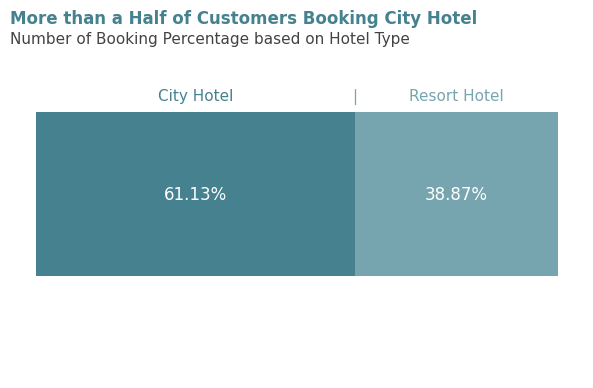

In [21]:
hotel = clean_df.groupby(['hotel']).agg({'hotel' : 'count'})
hotel = hotel.div(hotel.sum(), axis=1).T

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

hotel.plot(kind='barh', stacked=True, color = ['#45818e', '#76a5af'], ax = ax, width = 0.4)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

plt.text(y = 0, x = (hotel['City Hotel'][0]/2),
             s = (str(round((hotel['City Hotel'][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = 'white')

plt.text(y = 0, x = 1 - (hotel['Resort Hotel'][0]/2),
             s = (str(round((hotel['Resort Hotel'][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = 'white')

plt.text(y = 0.43, x = -0.05, s = 'More than a Half of Customers Booking City Hotel',
         ha='left', va='center', color = '#45818e', weight = 'bold', size=12)
plt.text(y = 0.38, x = -0.05, s = 'Number of Booking Percentage based on Hotel Type', ha='left', va='center', color = '#434343', weight = 'medium', size = 11)
plt.text(y = 0.24, x = (hotel['City Hotel'][0]/2), s = 'City Hotel', ha='center', va='center', color = '#45818e', weight = 'medium', size = 11)
plt.text(y = 0.24, x = (hotel['City Hotel'][0]), s = '|', ha='center', va='center', color = '#76a5af', size = 11)
plt.text(y = 0.24, x = 1 - (hotel['Resort Hotel'][0]/2), s = 'Resort Hotel', ha='center', va='center', color = '#76a5af', weight = 'medium', size = 11)

plt.legend().remove()

plt.tight_layout()
plt.show()

Key Takeaways : [Source](https://www.workathlon.com/post/resort-vs-city-hotel-employees-guests-sides#:~:text=What%20is%20a%20City%20Hotel,place%20that%20they%20are%20staying.)

1. We know that `61% customers are tourists or business travelers` who more likely to stay at a city hotel so that they can tour around the place where they are staying. They do not spend their day in the hotel and they only come back to sleep and shower, maybe a meal or two.
2. While `39% of customers are  vacationers` who visit a resort hotel to get away from other people and cities. They stay in the resort and probably don’t travel around as they may do when staying at a city hotel.

In [22]:
df_monthly = clean_df.groupby(['hotel', 'arrival_date_month']).agg({'adr':'count', 'arrival_date_year':'nunique'}).reset_index()
df_monthly['avg_monthly_booking'] = df_monthly['adr'] / df_monthly['arrival_date_year']
df_monthly = df_monthly.replace({'arrival_date_month': {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
                                            'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}})
df_monthly = df_monthly.sort_values(by = 'arrival_date_month').reset_index(drop=True)

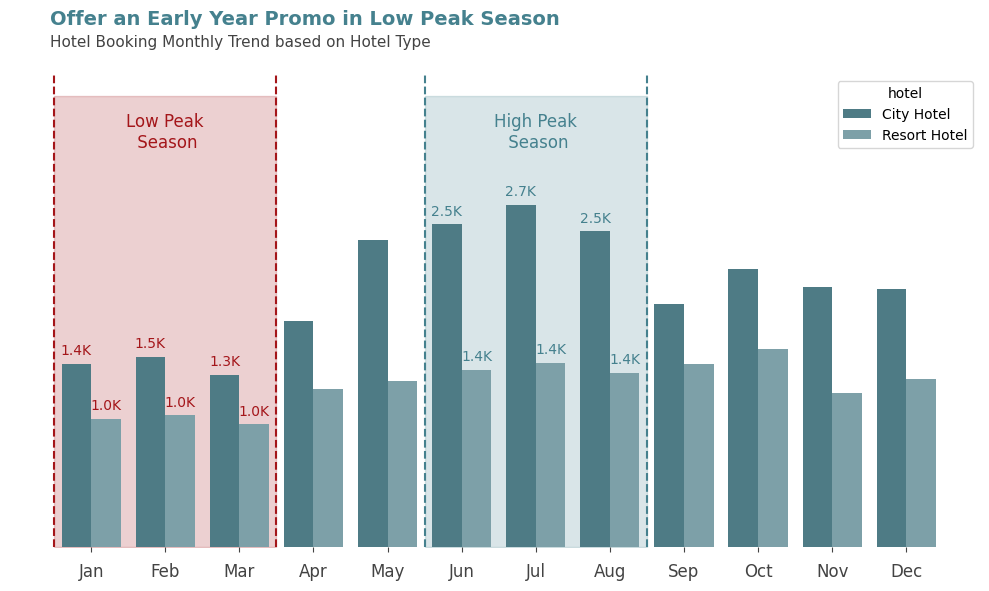

In [24]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

sns.barplot(x=df_monthly['arrival_date_month'], y = df_monthly['avg_monthly_booking'], hue=df_monthly.hotel, hue_order = ['City Hotel', 'Resort Hotel'], palette=['#45818e', '#76a5af'],)

plt.text(y = 4100, x = -0.55, s = 'Offer an Early Year Promo in Low Peak Season', ha='left', va='center', color = '#45818e', weight = 'bold', size = 14)
plt.text(y = 3920, x = -0.55, s = 'Hotel Booking Monthly Trend based on Hotel Type', ha='left', va='center', color = '#434343', weight = 'medium', size = 11)

plt.axvline(-0.5, ls='--', color='#a4161a')
plt.axvline(2.5, ls='--', color='#a4161a')
plt.stackplot(np.arange(-0.5,3.5), [[3500]], color='#a4161a', alpha=0.2)
plt.text(x=1, y=3100, s='Low Peak\n Season', fontsize=12, color='#a4161a', ha='center')

plt.axvline(4.5, ls='--', color='#45818e')
plt.axvline(7.5, ls='--', color='#45818e')
plt.stackplot(np.arange(4.5,8.5), [[3500]], color='#45818e', alpha=0.2)
plt.text(x=6, y=3100, s='High Peak\n Season', fontsize=12, color='#45818e', ha='center')

plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False, colors='#434343')
plt.ylabel("", labelpad = 15, color='#434343', size = 11)
plt.xticks(np.arange(12), ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'], size = 12)
plt.tick_params(axis = 'x', which = 'both', bottom = True, top = False, labelbottom = True, colors='#434343', pad = 8)
plt.xlabel("")

city_monthly = df_monthly[df_monthly.hotel == 'City Hotel'].reset_index(drop=True)
resort_monthly = df_monthly[df_monthly.hotel == 'Resort Hotel'].reset_index(drop=True)

for i in range(12):
  if i in (0,1,2):
    plt.text(x = i - 0.2, y = (city_monthly['avg_monthly_booking'][i] + 100),
             s = (str(round((city_monthly['avg_monthly_booking'][i]/1000),1))) + 'K',
             size = 10, ha='center', va='center', color = '#a4161a')
    plt.text(x = i + 0.2, y = (resort_monthly['avg_monthly_booking'][i] + 100),
             s = (str(round((resort_monthly['avg_monthly_booking'][i]/1000),1))) + 'K',
             size = 10, ha='center', va='center', color = '#a4161a')
  if i in (5,6,7):
    plt.text(x = i - 0.2, y = (city_monthly['avg_monthly_booking'][i] + 100),
             s = (str(round((city_monthly['avg_monthly_booking'][i]/1000),1))) + 'K',
             size = 10, ha='center', va='center', color = '#45818e')
    plt.text(x = i + 0.2, y = (resort_monthly['avg_monthly_booking'][i] + 100),
             s = (str(round((resort_monthly['avg_monthly_booking'][i]/1000),1))) + 'K',
             size = 10, ha='center', va='center', color = '#45818e')
  else:
    continue

plt.tight_layout()
plt.show()

Key Takeaways :

1. `High Peak Season` happened in `Jun - Aug` for the city hotel and resort hotel booking, it may happen because `Jun - Aug is the first semester holiday months` for Indonesian students, so they have a long holiday to go vacation.
2. Whereas, `Low Peak Season happened in Jan - Mar` for the city hotel and resort hotel booking, it may happen because `Jan - Mar` is the second semester holiday with short holiday time, and not a busy business travel time because it still an early year.
3. To optimize hotel resources, we need to control high demand in Jun - Aug by `offering an early year promo` to shift customers' intention go to on vacation from Jun - Aug to Jan - Mar.

### Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

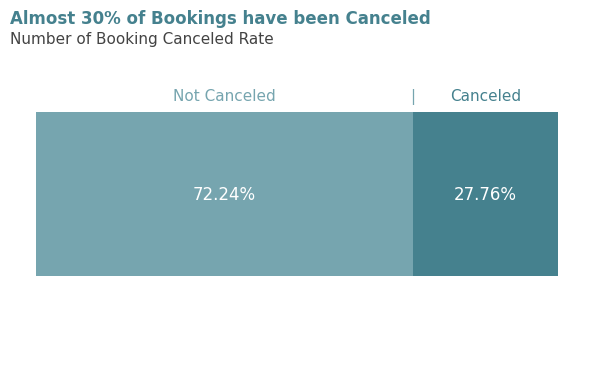

In [25]:
canceled = clean_df.groupby(['is_canceled']).agg({'is_canceled' : 'count'})
canceled = canceled.div(canceled.sum(), axis=1).T

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

canceled.plot(kind='barh', stacked=True, color = ['#76a5af', '#45818e'], ax = ax, width = 0.4)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

plt.text(y = 0, x = (canceled[0][0]/2),
             s = (str(round((canceled[0][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = 'white')

plt.text(y = 0, x = 1 - (canceled[1][0]/2),
             s = (str(round((canceled[1][0]*100),2))) + '%',
             size = 12, ha='center', va='center', color = 'white')

plt.text(y = 0.43, x = -0.05, s = 'Almost 30% of Bookings have been Canceled',
         ha='left', va='center', color = '#45818e', weight = 'bold', size=12)
plt.text(y = 0.38, x = -0.05, s = 'Number of Booking Canceled Rate', ha='left', va='center', color = '#434343', weight = 'medium', size = 11)
plt.text(y = 0.24, x = (canceled[0][0]/2), s = 'Not Canceled', ha='center', va='center', color = '#76a5af', weight = 'medium', size = 11)
plt.text(y = 0.24, x = (canceled[0][0]), s = '|', ha='center', va='center', color = '#76a5af', size = 11)
plt.text(y = 0.24, x = 1 - (canceled[1][0]/2), s = 'Canceled', ha='center', va='center', color = '#45818e', weight = 'medium', size = 11)

plt.legend().remove()

plt.tight_layout()
plt.show()

Key Takeaways :

1. We know that `almost 30% of bookings have been canceled`. Canceled booking means opportunity costs for the hotel. Because it should be revenue for the hotel, but customers take it back. It can indirectly affect to hotel's revenue.
Therefore, we need to further analyze why they canceled their booking.

In [26]:
clean_df['total_stays'] = np.where((clean_df['stays_in_weekend_nights'] + clean_df['stays_in_weekdays_nights']) < 8, "1 Week",
                             np.where((clean_df['stays_in_weekend_nights'] + clean_df['stays_in_weekdays_nights']) < 15, "2 Weeks",
                                      np.where((clean_df['stays_in_weekend_nights'] + clean_df['stays_in_weekdays_nights']) < 22, "3 Weeks",
                                               np.where((clean_df['stays_in_weekend_nights'] + clean_df['stays_in_weekdays_nights']) < 29, "4 Weeks", "5 Weeks"))))

In [27]:
cr = clean_df.groupby(['hotel', 'total_stays']).agg({'is_canceled' : 'sum', 'adr' : 'count'}).reset_index()
cr['cr'] = cr['is_canceled'] / cr['adr']

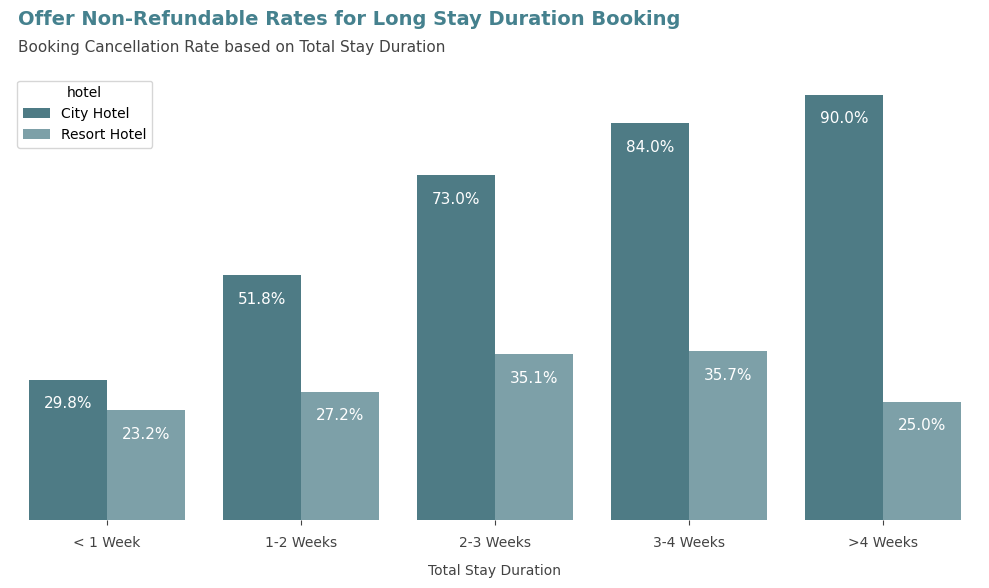

In [28]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

sns.barplot(x=cr['total_stays'], y = cr['cr'], hue=cr['hotel'], hue_order = ['City Hotel', 'Resort Hotel'], palette=['#45818e', '#76a5af'])

plt.text(y = 1.06, x = -0.46, s = 'Offer Non-Refundable Rates for Long Stay Duration Booking', ha='left', va='center', color = '#45818e', weight = 'bold', size = 14)
plt.text(y = 1, x = -0.46, s = 'Booking Cancellation Rate based on Total Stay Duration', ha='left', va='center', color = '#434343', weight = 'medium', size = 11)

plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False, colors='#434343')
plt.ylabel("", labelpad = 15, color='#434343', size = 11)
plt.xticks(np.arange(5), ['< 1 Week', '1-2 Weeks','2-3 Weeks','3-4 Weeks','>4 Weeks'], size = 10)
plt.tick_params(axis = 'x', which = 'both', bottom = True, top = False, labelbottom = True, colors='#434343', pad = 8)
plt.xlabel("Total Stay Duration", labelpad = 10, color = '#434343')

city_cr = cr[cr.hotel == 'City Hotel'].reset_index(drop=True)
resort_cr = cr[cr.hotel == 'Resort Hotel'].reset_index(drop=True)

for i in range(5):
  plt.text(x = i - 0.2, y = (city_cr['cr'][i]-0.05),
            s = (str(round((city_cr['cr'][i])*100,1))) + '%',
            size = 11, ha='center', va='center', color = 'white')
  plt.text(x = i + 0.2, y = (resort_cr['cr'][i]-0.05),
            s = (str(round((resort_cr['cr'][i])*100,1))) + '%',
             size = 11, ha='center', va='center', color = 'white')

plt.tight_layout()
plt.show()

Key Takeaways : [Source](https://partner.booking.com/en-us/help/guides/how-better-understand-prevent-and-reduce-cancellations)

1. We know that `most of the cancellation rates are dominated by city hotel booking`.
2. Besides that, `the longer stay duration booked by customers causes a higher cancellation rate` for both city hotels and resort hotels. Except for > 4 Weeks Total Stay Duration Resort Hotel Booking.
3. To prevent customers to cancel their booking, we could `offer non-refundable rates for the long stay duration booking`. But, this rate will be cheaper than usual rates that allow free cancellation. This offer could be combined with a long stay duration policy. <br>
`Customers who make non-refundable reservations are generally more committed to their stays` because they'll have to pay if they cancel, make changes, or are no-shows. <br>
Based on the research, `non-refundable rates are very attractive to bookers and can increase your visibility on search engines`. On average, we see adding a `non-refundable rate plan can help reduce cancellations by at least 9% – and increase bookings by at least 5%`.
4. Besides that, we also consider `offering guests the option to pay online when they booking`.

### Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [29]:
clean_df['cat_lead_time'] = np.where(clean_df['lead_time'] < 60, "<2 Months",
                           np.where(clean_df['lead_time'] < 120, "2-4 Months",
                                    np.where(clean_df['lead_time'] < 180, "4-6 Months",
                                             np.where(clean_df['lead_time'] < 240, "6-8 Months",
                                                      np.where(clean_df['lead_time'] < 300, "8-10 Months",
                                                               np.where(clean_df['lead_time'] < 360, "10-12 Months", ">12 Months"))))))

In [30]:
lt = clean_df.groupby(['hotel', 'cat_lead_time']).agg({'is_canceled' : 'sum', 'adr' : 'count'}).reset_index().sort_values('is_canceled', ascending=False)
lt['cr'] = lt['is_canceled'] / lt['adr']
lt

,hotel,cat_lead_time,is_canceled,adr,cr
5,City Hotel,<2 Months,6724,28415,0.24
1,City Hotel,2-4 Months,3797,10963,0.35
12,Resort Hotel,<2 Months,2931,18121,0.16
2,City Hotel,4-6 Months,2504,6654,0.38
8,Resort Hotel,2-4 Months,1754,5485,0.32
3,City Hotel,6-8 Months,1423,3554,0.40
9,Resort Hotel,4-6 Months,1328,4202,0.32
10,Resort Hotel,6-8 Months,935,2831,0.33
4,City Hotel,8-10 Months,755,1515,0.50
11,Resort Hotel,8-10 Months,504,1432,0.35


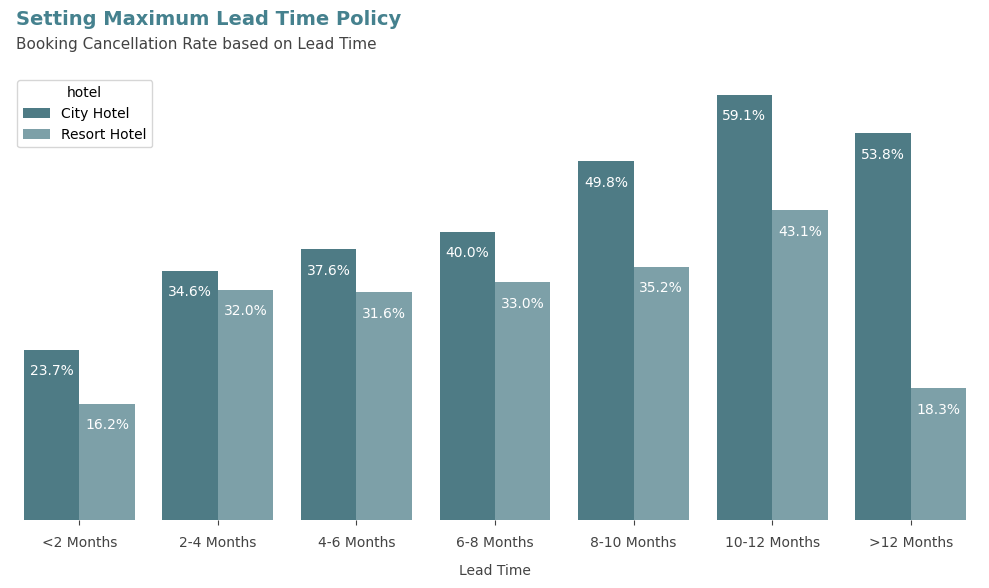

In [31]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

sns.barplot(x=lt['cat_lead_time'], y = lt['cr'], hue=lt['hotel'], hue_order = ['City Hotel', 'Resort Hotel'], palette=['#45818e', '#76a5af'])

plt.text(y = 0.695, x = -0.46, s = 'Setting Maximum Lead Time Policy', ha='left', va='center', color = '#45818e', weight = 'bold', size = 14)
plt.text(y = 0.66, x = -0.46, s = 'Booking Cancellation Rate based on Lead Time', ha='left', va='center', color = '#434343', weight = 'medium', size = 11)

plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False, colors='#434343')
plt.ylabel("", labelpad = 15, color='#434343', size = 11)
plt.tick_params(axis = 'x', which = 'both', bottom = True, top = False, labelbottom = True, colors='#434343', pad = 8)
plt.xlabel("Lead Time", labelpad = 10, color = '#434343')

city_lt = lt[lt.hotel == 'City Hotel'].reset_index(drop=True)
resort_lt = lt[lt.hotel == 'Resort Hotel'].reset_index(drop=True)

for i in range(7):
  plt.text(x = i - 0.2, y = (city_lt['cr'][i]-0.03),
            s = (str(round((city_lt['cr'][i])*100,1))) + '%',
            size = 10, ha='center', va='center', color = 'white')
  plt.text(x = i + 0.2, y = (resort_lt['cr'][i]-0.03),
            s = (str(round((resort_lt['cr'][i])*100,1))) + '%',
             size = 10, ha='center', va='center', color = 'white')

plt.tight_layout()
plt.show()

Key Takeaways :

1. We know that `most of the cancellation rates are dominated by city hotel booking`.
2. Besides that, `the longer lead time booking by customers causes a higher cancellation rate` for both city hotels and resort hotels. Except for > 12 Months Lead Time Resort Hotel Booking.
3. Therefore, we need to avoid getting bookings too far in advance, since those customers’ plans are more likely to change and result in cancellations. `Setting a maximum lead time booking` restriction can help us to prevent this issue.
4. Besides that, we also consider `offering guests the option to pay online when they booking`.